In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
from statistics import mean

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Lambda,S,P,Error,Expected
0,0.01,0.01,0.923816,0.000804,0.9975
1,0.26,0.26,0.934057,0.000394,0.9350
2,0.51,0.51,0.874941,0.000297,0.8725
3,0.76,0.76,0.805872,0.000429,0.8100
4,1.01,1.01,0.697791,0.000800,0.7475


In [3]:
df.sort_values(by=['S','Lambda'],inplace=True)
df.head()

,Lambda,S,P,Error,Expected
0,0.01,0.01,0.923816,0.000804,0.9975
1,0.26,0.26,0.934057,0.000394,0.9350
2,0.51,0.51,0.874941,0.000297,0.8725
3,0.76,0.76,0.805872,0.000429,0.8100
4,1.01,1.01,0.697791,0.000800,0.7475


In [4]:
# Lambda = np.array(df["Lambda"].to_list())
# S = np.array(df["S"].to_list())
# P = np.array(df["P"].to_list())

# Lambda_start = Lambda[0]
# Lambda_end = Lambda[-1]
# s_start = S[0]
# s_end = S[-1]
# l = int(np.sqrt(len(Lambda)))

# Lambda.shape = (l,l)
# S.shape = (l,l)
# P.shape = (l,l)

In [5]:
Lambda_list = df["Lambda"].to_list()
s_list = df["S"].to_list()
p_avg_list = df["P"].to_list()
p_expec_list = df['Expected'].to_list()
yerr = df['Error'].to_list()
# x_list = df["x"].to_list()
# F_list = df["free energy"].to_list()

In [6]:
index_a = 0
for i in range(len(Lambda_list)):
    if Lambda_list[i] > 2:
        index_a = i
        break
x = 2*np.ones(100)
y = np.linspace(0,0.5,100)
m = 0.5*np.ones(100)
n = np.linspace(0,2,100)

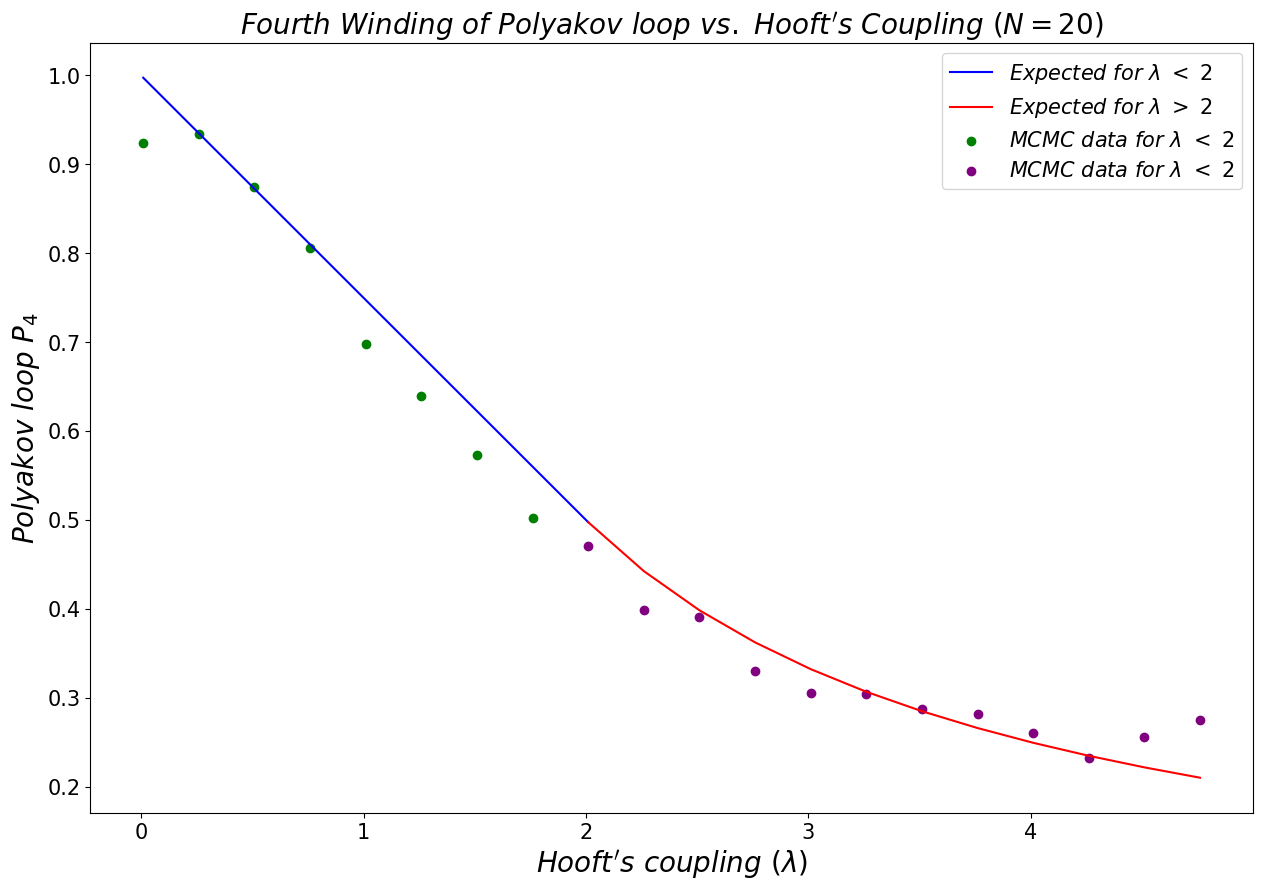

In [7]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(Lambda_list[0:index_a+1], p_expec_list[0:index_a+1], color='b', label=r"$Expected\ for\ \lambda\ <\ 2$")
plt.plot(Lambda_list[index_a:], p_expec_list[index_a:], color='r', label=r"$Expected\ for\ \lambda\ >\ 2$")
plt.scatter(Lambda_list[0:index_a], p_avg_list[0:index_a], color="g",label=r"$MCMC\ data\ for\ \lambda\ <\ 2$")
plt.scatter(Lambda_list[index_a:], p_avg_list[index_a:], color="purple", label=r"$MCMC\ data\ for\ \lambda\ <\ 2$")
# plt.plot(x,y, color='black')
# plt.plot(n,m, color='black')
plt.title(r"$Fourth\ Winding\ of\ Polyakov\ loop\ vs.\ Hooft's\ Coupling\ (N=20)$", fontsize=20)
plt.xlabel(r"$Hooft's \ coupling \ (\lambda)$", fontsize=20)
plt.ylabel(r"$Polyakov\ loop\ P_4$", fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Plot3.1.png", dpi=300)
plt.show()

In [8]:
df = pd.read_csv("Thermalization.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,-9454.919524,-9471.814117,-9471.814117,-9504.548272,-9570.651715,-9627.230485,-9627.230485,-9627.230485,-9627.230485,-9627.230485,...,-58505.451235,-58514.341400,-58514.341400,-58514.093283,-58514.093283,-58514.093283,-58520.094645,-58518.913168,-58518.913168,-58518.913168
1,-204.687421,-205.233857,-235.923995,-236.634749,-236.634749,-236.634749,-235.881457,-237.059464,-237.865256,-237.865256,...,-1827.514769,-1827.514769,-1825.617271,-1825.290358,-1826.387802,-1826.387802,-1826.387802,-1826.347191,-1826.371186,-1825.875738
2,-124.216326,-124.671293,-124.989615,-124.989615,-124.989615,-124.979994,-124.694154,-124.720113,-125.159002,-124.774669,...,-802.149507,-803.076309,-802.917119,-802.917119,-802.917119,-802.034567,-805.903329,-805.903329,-806.291357,-806.291357
3,-52.814926,-52.960623,-52.960623,-53.096003,-53.598131,-53.670589,-52.928259,-54.323436,-54.165237,-54.165237,...,-463.506963,-463.554127,-463.643018,-463.643018,-463.643018,-463.524133,-462.970417,-462.947215,-462.947215,-462.859149
4,-51.362335,-52.330027,-52.336424,-52.336424,-53.636098,-54.893697,-56.385425,-57.214467,-57.836780,-59.432061,...,-385.603406,-384.982130,-384.982130,-384.932387,-384.869746,-384.904305,-385.406378,-385.596383,-385.596383,-385.275116


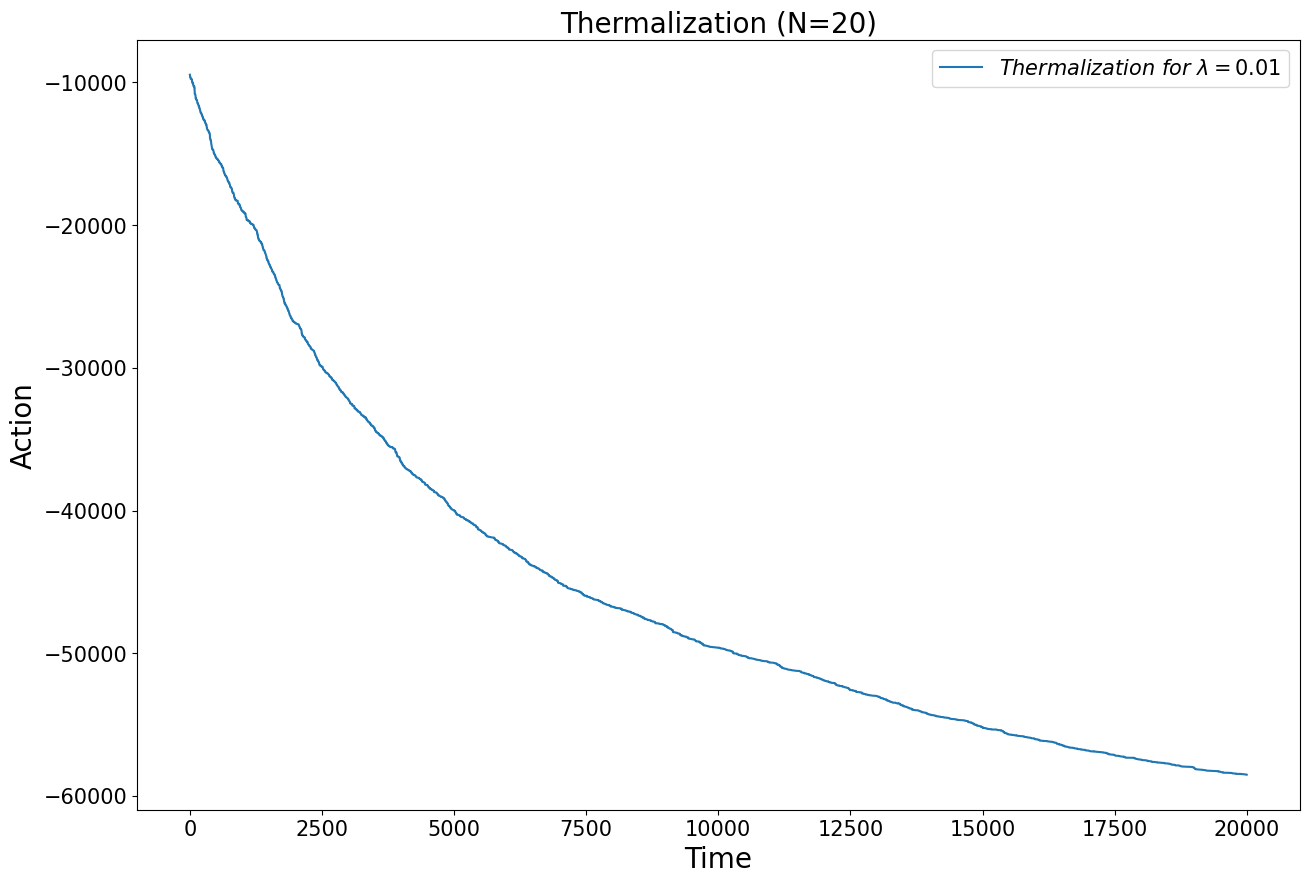

In [9]:
therm_list = df.iloc[0].to_list()
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(range(len(therm_list)), therm_list, label=r"$Thermalization\ for\ \lambda=$"+str(Lambda_list[0]))
plt.title("Thermalization (N=20)", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Action", fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Plot3.8.png", dpi=300)
plt.show()

In [10]:
df = pd.read_csv("Action.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,-58518.913168,-58519.089490,-58519.089490,-58519.089490,-58519.089490,-58519.089490,-58519.089490,-58519.089490,-58519.089490,-58519.089490,...,-68841.884142,-68841.884142,-68841.734714,-68841.734714,-68841.734714,-68843.666148,-68843.666148,-68843.844186,-68843.844186,-68843.844186
1,-1825.881458,-1825.809762,-1825.809762,-1825.809762,-1825.809762,-1825.809762,-1825.801664,-1823.855887,-1824.218813,-1825.917553,...,-2683.679791,-2683.506427,-2683.506427,-2683.506427,-2683.627878,-2683.619573,-2683.630478,-2683.618580,-2683.466189,-2683.466189
2,-806.291357,-807.063078,-807.069987,-806.927290,-806.927290,-806.944676,-806.944676,-806.944676,-807.402495,-806.957212,...,-1180.806819,-1180.913642,-1181.162739,-1181.574717,-1181.583052,-1181.583052,-1181.509280,-1181.750432,-1181.850420,-1181.850420
3,-463.516918,-463.733772,-464.095230,-464.724640,-464.724640,-464.745109,-464.745109,-464.302866,-464.302866,-464.302866,...,-722.208766,-722.237495,-722.237495,-722.572798,-722.632740,-722.632740,-722.527088,-722.528696,-722.799098,-723.253266
4,-385.275116,-385.522827,-386.811536,-386.662527,-386.545293,-386.389155,-386.389155,-386.389155,-386.389155,-386.769894,...,-554.951492,-554.962470,-555.097940,-555.103654,-555.103642,-555.100493,-555.007296,-554.626427,-554.634048,-554.861547


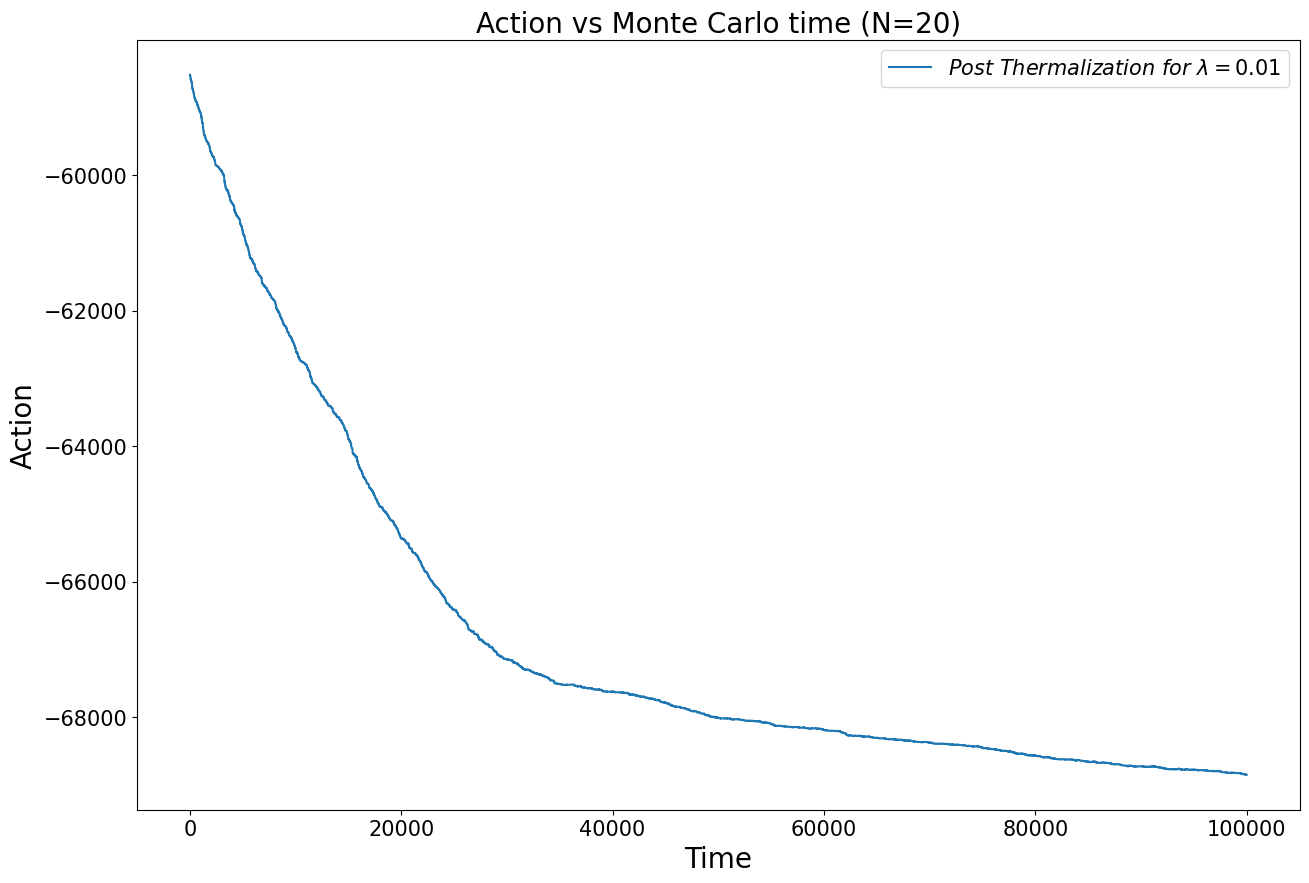

In [11]:
act_list = df.iloc[0].to_list()
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(range(len(act_list)), act_list, label=r"$Post\ Thermalization\ for\ \lambda=$"+str(Lambda_list[0]))
plt.title("Action vs Monte Carlo time (N=20)", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Action", fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Plot3.9.png", dpi=300)
plt.show()

In [12]:
# act_list = []
# for i in range(len(df)):
#     act_list.append(mean(df.iloc[i].to_list()))
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.plot(Lambda_list, act_list)
# plt.title(r"$Action\ vs.\ Hooft's\ Coupling\ (\lambda)\ (N=20)$", fontsize=15)
# plt.xlabel(r"$Hooft's\ Coupling\ (\lambda)$", fontsize=15)
# plt.ylabel(r"$Action$", fontsize=15)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("Plot3.10.jpg", dpi=600)
# plt.show()

In [13]:
# df = pd.read_csv("Data2.csv")
# s_list = df["S"].to_list()
# p_avg_list_2 = df["P"].to_list()

In [14]:
# index_b = 0
# for i in range(len(s_list)):
#     if s_list[i] > 2:
#         index_b = i
#         break
# x = 2*np.ones(100)
# y = np.linspace(0,0.5,100)
# m = 0.5*np.ones(100)
# n = np.linspace(0,2,100)

In [15]:
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.scatter(s_list[0:index_b+1], p_avg_list_2[0:index_b+1], color="black", label=r"$MCMC\ data\ for\ s\ <\ 2$")
# plt.scatter(s_list[index_b:], p_avg_list_2[index_b:], color="red", label=r"$MCMC\ data\ for\ s\ >\ 2$")
# plt.plot(x,y, color='black')
# plt.plot(n,m, color='black')
# plt.title(r"$Polyakov\ loop\ vs.\ s$", fontsize=20)
# plt.xlabel(r"$s$", fontsize=20)
# plt.ylabel(r"$Polyakov\ loop\ P$", fontsize=20)
# plt.legend(fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.savefig("Plot3.2.png", dpi=300)
# plt.show()

In [16]:
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.scatter(Lambda_list, p_avg_list, color='black', label=r"$MCMC\ data\ for\ GWW$")
# plt.scatter(s_list, p_avg_list_2, color='red', label=r"$MCMC\ data\ for\ deformed\ GWW$", marker='^')
# plt.plot(Lambda_list, p_expec_list, color='b', label=r"$Expected$")
# plt.plot(x,y, color='black')
# plt.plot(n,m, color='black')
# plt.title(r"$Polyakov\ loop\ vs.\ s$", fontsize=20)
# plt.xlabel(r"$s$", fontsize=20)
# plt.ylabel(r"$Polyakov\ loop\ P$", fontsize=20)
# plt.legend(fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.savefig("Plot3.2.png", dpi=600)
# plt.show()

In [17]:
# l = 0
# for i in range(len(x_list)):
#     if x_list[i]!=0:
#         l=i
#         break
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.plot(x_list[l:], F_list[l:], color="r", label="MCMC data for g = " + str(g_list[0]))
# plt.title("Free energy vs. x", fontsize=15)
# plt.xlabel("x", fontsize=15)
# plt.ylabel("Free energy", fontsize=15)
# plt.legend(fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("Plot3.3.jpg", dpi=600)
# plt.show()

In [18]:
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.plot(s_list, F_list, color="r", label="MCMC data for g = " + str(g_list[0]))
# plt.title("Free energy vs. s factor", fontsize=15)
# plt.xlabel("s factor", fontsize=15)
# plt.ylabel("Free energy", fontsize=15)
# plt.legend(fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("Plot3.4.jpg", dpi=600)
# plt.show()

In [19]:
df = pd.read_csv("Acceptance_rate.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,29.0,27.5,27.666667,25.75,25.0,24.333333,24.571429,24.375,24.777778,24.5,...,18.426842,18.423387,18.419940,18.413481,18.414070,18.415663,18.418255,18.421844,18.417417,18.429
1,58.0,60.5,57.666667,60.00,59.2,60.500000,59.714286,60.750,60.888889,61.5,...,68.128153,68.125000,68.109768,68.088531,68.060302,68.060241,68.077232,68.070140,68.072072,68.067
2,74.0,77.5,76.666667,76.25,75.8,74.500000,74.714286,75.875,75.666667,75.4,...,79.181635,79.190524,79.200403,79.205231,79.213065,79.223896,79.235707,79.235471,79.242242,79.240
3,82.0,82.5,78.333333,77.00,77.0,76.666667,76.142857,76.625,77.555556,77.7,...,89.713421,89.717742,89.722054,89.725352,89.721608,89.724900,89.728185,89.731463,89.729730,89.732
4,72.0,71.0,73.333333,75.50,74.8,75.333333,76.428571,77.000,77.333333,76.7,...,90.459132,90.463710,90.463243,90.463783,90.468342,90.472892,90.477432,90.480962,90.478478,90.481


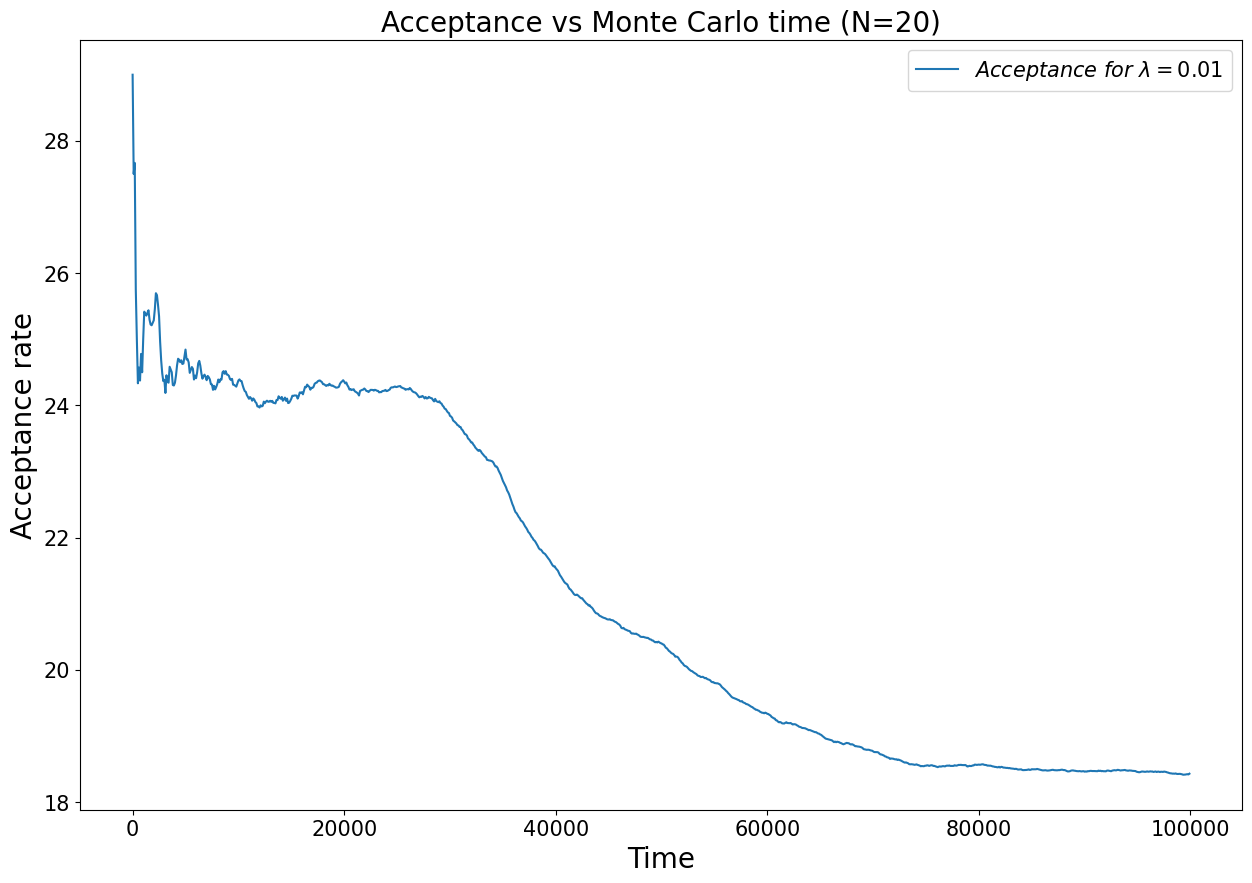

In [20]:
a_rate = df.iloc[0].to_list()
# for i in df.columns:
#     a_rate.append(mean(df[i].to_list()))
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(list(np.arange(0,100000,100)), a_rate, label=r"$Acceptance\ for\ \lambda=$"+str(Lambda_list[0]))
plt.title("Acceptance vs Monte Carlo time (N=20)", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Acceptance rate", fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Plot3.5.png", dpi=300)
plt.show()

In [ ]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection="3d")
# ax.plot_surface(Lambda, S, P, cmap='inferno', edgecolor="none")
# ax.set_title("Polyakov loop vs coupling and s factors")
# ax.set_xlabel("g factor")
# ax.set_ylabel("s factor")
# ax.set_zlabel("Polyakov loop P")
# plt.savefig("Plot3.6.jpg", dpi=600)
# plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xnew, ynew = np.mgrid[Lambda_start:Lambda_end:80j, s_start:s_end:80j]
# tck = interpolate.bisplrep(Lambda, S, P, s=1)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
# ax.plot_surface(xnew, ynew, znew, cmap='inferno')
# ax.set_title("Polyakov loop vs coupling and s factors")
# ax.set_xlabel("g factor")
# ax.set_ylabel("s factor")
# ax.set_zlabel("Polyakov loop P")
# plt.savefig("Plot3.7.jpg", dpi=600)
# plt.show()